<a href="https://colab.research.google.com/github/yukinaga/minnano_ai/blob/master/section_4/exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 演習
中間層のニューロン数を増やすことで、ニューラルネットワークの表現力が向上することを確認しましょう。

## ● ニューロンの追加
以下のセルにコードを追記し、中間層に3つ、出力層に1つのニューロンを持つニューラルネットワークを構築しましょう。  
重みとバイアスを設定するコードは既に中間層の3つのニューロンに対応しているので、変更する必要はありません。

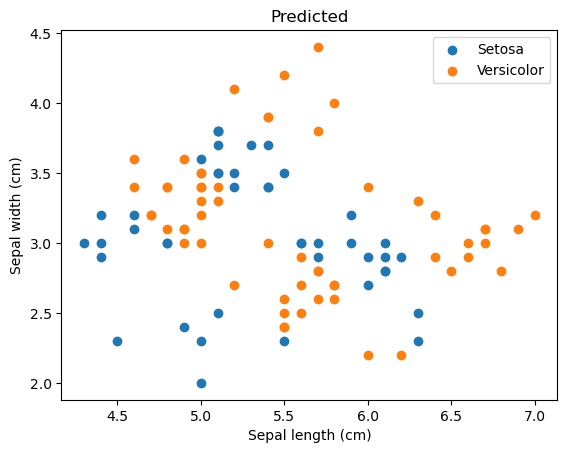

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
sl_data = iris_data[:100, 0].copy() # SetosaとVersicolor、Sepal length: copy()で元データが変更されない
sw_data = iris_data[:100, 1].copy() # SetosaとVersicolor、Sepal width

# 平均値を0に
sl_ave = np.average(sl_data)  # 平均値
sl_data -= sl_ave  # 平均値を引く
sw_ave = np.average(sw_data)
sw_data -= sw_ave

# 入力をリストに格納
input_data = []
for i in range(100):  # iには0から99までが入る
    input_data.append([sl_data[i], sw_data[i]])

# シグモイド関数
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# ニューロン
class Neuron:
    def __init__(self):  # 初期設定
        self.input_sum = 0.0
        self.output = 0.0

    def set_input(self, inp):
        self.input_sum += inp

    def get_output(self):
        self.output = sigmoid(self.input_sum)
        return self.output

    def reset(self):
        self.input_sum = 0
        self.output = 0

# ニューラルネットワーク
class NeuralNetwork:
    def __init__(self):  # 初期設定
        # 重み（変更しない）
        self.w_im = [[4.0, 4.0], [4.0, 4.0], [4.0, 4.0]]  # 入力:2 ニューロン数:3
        self.w_mo = [[1.0, -1.0, 1.0]]  # 入力:3 ニューロン数:1

        # バイアス（変更しない）
        self.b_m = [3.0, 0.0, -3.0]  # ニューロン数:3
        self.b_o = [-0.5]  # ニューロン数:1

        # 各層の宣言
        self.input_layer = [0.0, 0.0]
        self.middle_layer = [Neuron(), Neuron(), Neuron()]
        self.output_layer = [Neuron()]

    def commit(self, input_data):  # 実行
        # 各層のリセット
        self.input_layer[0] = input_data[0]  # 入力層は値を受け取るのみ
        self.input_layer[1] = input_data[1]
        self.middle_layer[0].reset()
        self.middle_layer[1].reset()
        self.middle_layer[2].reset()
        self.output_layer[0].reset()

        # 入力層→中間層
        self.middle_layer[0].set_input(self.input_layer[0] * self.w_im[0][0])
        self.middle_layer[0].set_input(self.input_layer[1] * self.w_im[0][1])
        self.middle_layer[0].set_input(self.b_m[0])

        self.middle_layer[1].set_input(self.input_layer[0] * self.w_im[1][0])
        self.middle_layer[1].set_input(self.input_layer[1] * self.w_im[1][1])
        self.middle_layer[1].set_input(self.b_m[1])

        self.middle_layer[2].set_input(self.input_layer[0] * self.w_im[2][0])
        self.middle_layer[2].set_input(self.input_layer[1] * self.w_im[2][1])
        self.middle_layer[2].set_input(self.b_m[2])

        # 中間層→出力層
        self.output_layer[0].set_input(self.middle_layer[0].get_output() * self.w_mo[0][0])
        self.output_layer[0].set_input(self.middle_layer[1].get_output() * self.w_mo[0][1])
        self.output_layer[0].set_input(self.middle_layer[2].get_output() * self.w_mo[0][2])
        self.output_layer[0].set_input(self.b_o[0])

        return self.output_layer[0].get_output()

# ニューラルネットワークのインスタンス
neural_network = NeuralNetwork()

# 実行
st_predicted = [[], []]  # Setosa
vc_predicted = [[], []]  # Versicolor
for data in input_data:
    if neural_network.commit(data) < 0.5:
        st_predicted[0].append(data[0]+sl_ave)
        st_predicted[1].append(data[1]+sw_ave)
    else:
        vc_predicted[0].append(data[0]+sl_ave)
        vc_predicted[1].append(data[1]+sw_ave)

# 分類結果をグラフ表示
plt.scatter(st_predicted[0], st_predicted[1], label="Setosa")
plt.scatter(vc_predicted[0], vc_predicted[1], label="Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Predicted")
plt.show()

## 解答例
以下は解答例です。どうしても手がかりがつかめないときのみ参考にしましょう。

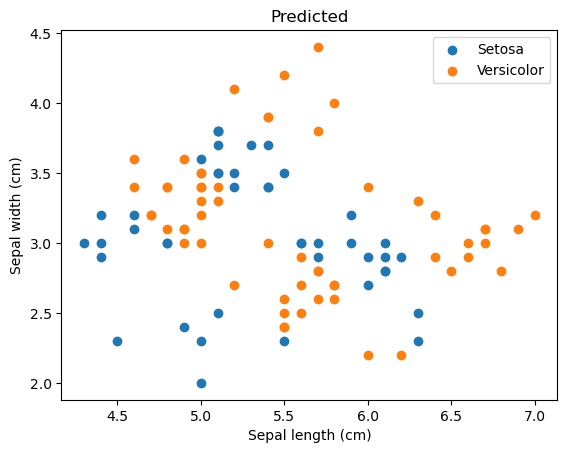

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
sl_data = iris_data[:100, 0].copy() # SetosaとVersicolor、Sepal length: copy()で元データが変更されない
sw_data = iris_data[:100, 1].copy() # SetosaとVersicolor、Sepal width

# 平均値を0に
sl_ave = np.average(sl_data)  # 平均値
sl_data -= sl_ave  # 平均値を引く
sw_ave = np.average(sw_data)
sw_data -= sw_ave

# 入力をリストに格納
input_data = []
for i in range(100):  # iには0から99までが入る
    input_data.append([sl_data[i], sw_data[i]])

# シグモイド関数
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# ニューロン
class Neuron:
    def __init__(self):  # 初期設定
        self.input_sum = 0.0
        self.output = 0.0

    def set_input(self, inp):
        self.input_sum += inp

    def get_output(self):
        self.output = sigmoid(self.input_sum)
        return self.output

    def reset(self):
        self.input_sum = 0
        self.output = 0

# ニューラルネットワーク
class NeuralNetwork:
    def __init__(self):  # 初期設定
        # 重み（変更しない）
        self.w_im = [[4.0, 4.0], [4.0, 4.0], [4.0, 4.0]]  # 入力:2 ニューロン数:3
        self.w_mo = [[1.0, -1.0, 1.0]]  # 入力:2 ニューロン数:1

        # バイアス（変更しない）
        self.b_m = [3.0, 0.0, -3.0]  # ニューロン数:2
        self.b_o = [-0.5]  # ニューロン数:1

        # 各層の宣言
        self.input_layer = [0.0, 0.0]
        self.middle_layer = [Neuron(), Neuron(), Neuron()]
        self.output_layer = [Neuron()]

    def commit(self, input_data):  # 実行
        # 各層のリセット
        self.input_layer[0] = input_data[0]  # 入力層は値を受け取るのみ
        self.input_layer[1] = input_data[1]
        self.middle_layer[0].reset()
        self.middle_layer[1].reset()
        self.middle_layer[2].reset()
        self.output_layer[0].reset()

        # 入力層→中間層
        self.middle_layer[0].set_input(self.input_layer[0] * self.w_im[0][0])
        self.middle_layer[0].set_input(self.input_layer[1] * self.w_im[0][1])
        self.middle_layer[0].set_input(self.b_m[0])

        self.middle_layer[1].set_input(self.input_layer[0] * self.w_im[1][0])
        self.middle_layer[1].set_input(self.input_layer[1] * self.w_im[1][1])
        self.middle_layer[1].set_input(self.b_m[1])

        self.middle_layer[2].set_input(self.input_layer[0] * self.w_im[2][0])
        self.middle_layer[2].set_input(self.input_layer[1] * self.w_im[2][1])
        self.middle_layer[2].set_input(self.b_m[2])

        # 中間層→出力層
        self.output_layer[0].set_input(self.middle_layer[0].get_output() * self.w_mo[0][0])
        self.output_layer[0].set_input(self.middle_layer[1].get_output() * self.w_mo[0][1])
        self.output_layer[0].set_input(self.middle_layer[2].get_output() * self.w_mo[0][2])
        self.output_layer[0].set_input(self.b_o[0])

        return self.output_layer[0].get_output()

# ニューラルネットワークのインスタンス
neural_network = NeuralNetwork()

# 実行
st_predicted = [[], []]  # Setosa
vc_predicted = [[], []]  # Versicolor
for data in input_data:
    if neural_network.commit(data) < 0.5:
        st_predicted[0].append(data[0]+sl_ave)
        st_predicted[1].append(data[1]+sw_ave)
    else:
        vc_predicted[0].append(data[0]+sl_ave)
        vc_predicted[1].append(data[1]+sw_ave)

# 分類結果をグラフ表示
plt.scatter(st_predicted[0], st_predicted[1], label="Setosa")
plt.scatter(vc_predicted[0], vc_predicted[1], label="Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Predicted")
plt.show()